## Power Production Predictions Project

In [6]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [14, 8]


In [7]:
xtrain = pd.read_csv("powerproduction.txt", sep=",")

ytrain = xtrain["power"]
xtrain = xtrain["speed"]

ytrain.drop(index=0, inplace=True)
xtrain.drop(index=0, inplace=True)


In [8]:
model = keras.Sequential([keras.layers.Dense(128)])
#model.add(keras.layers.Dense(1, input_shape=(1,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"))

model.compile(loss="MeanSquaredError", optimizer="Adam")
history = model.fit(xtrain, ytrain, epochs = 1000)
model.summary()

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 4049.5617
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 4016.5417
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 3977.3088
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 4053.3045
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 3957.9588
Epoch 6/1000
16/16 [==============================] - 0s 1000us/step - loss: 3942.8596
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 3986.7839
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 3866.2745
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 3872.4592
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 3827.6753
Epoch 11/1000
16/16 [==============================] - 0s 1000us/step - loss: 3643.1328
Epoch 12/1000
16/16 [==============================] - 0s 1ms/step -

16/16 [==============================] - 0s 1ms/step - loss: 2108.7779
Epoch 97/1000
16/16 [==============================] - 0s 1ms/step - loss: 1951.9779
Epoch 98/1000
16/16 [==============================] - 0s 1ms/step - loss: 1864.1995
Epoch 99/1000
16/16 [==============================] - 0s 867us/step - loss: 2058.5623
Epoch 100/1000
16/16 [==============================] - 0s 867us/step - loss: 1993.8246
Epoch 101/1000
16/16 [==============================] - 0s 867us/step - loss: 1941.2961
Epoch 102/1000
16/16 [==============================] - 0s 867us/step - loss: 1944.1235
Epoch 103/1000
16/16 [==============================] - 0s 933us/step - loss: 1901.3360
Epoch 104/1000
16/16 [==============================] - 0s 933us/step - loss: 1943.2265
Epoch 105/1000
16/16 [==============================] - 0s 934us/step - loss: 1983.3250
Epoch 106/1000
16/16 [==============================] - 0s 867us/step - loss: 1941.2697
Epoch 107/1000
16/16 [==============================] - 

16/16 [==============================] - 0s 933us/step - loss: 1001.3909
Epoch 190/1000
16/16 [==============================] - 0s 1000us/step - loss: 1004.0767
Epoch 191/1000
16/16 [==============================] - 0s 866us/step - loss: 1024.6941
Epoch 192/1000
16/16 [==============================] - 0s 933us/step - loss: 1019.0564
Epoch 193/1000
16/16 [==============================] - 0s 867us/step - loss: 1034.9476
Epoch 194/1000
16/16 [==============================] - 0s 933us/step - loss: 932.9943
Epoch 195/1000
16/16 [==============================] - 0s 933us/step - loss: 958.5152
Epoch 196/1000
16/16 [==============================] - 0s 867us/step - loss: 944.6815
Epoch 197/1000
16/16 [==============================] - 0s 933us/step - loss: 1017.9723
Epoch 198/1000
16/16 [==============================] - 0s 933us/step - loss: 947.5440
Epoch 199/1000
16/16 [==============================] - 0s 933us/step - loss: 980.3826
Epoch 200/1000
16/16 [=============================

16/16 [==============================] - 0s 933us/step - loss: 570.4153
Epoch 284/1000
16/16 [==============================] - 0s 1ms/step - loss: 590.7313
Epoch 285/1000
16/16 [==============================] - 0s 1ms/step - loss: 607.8563
Epoch 286/1000
16/16 [==============================] - 0s 867us/step - loss: 579.8246
Epoch 287/1000
16/16 [==============================] - 0s 867us/step - loss: 585.8280
Epoch 288/1000
16/16 [==============================] - 0s 934us/step - loss: 573.9641
Epoch 289/1000
16/16 [==============================] - 0s 1ms/step - loss: 607.7583
Epoch 290/1000
16/16 [==============================] - 0s 866us/step - loss: 561.3595
Epoch 291/1000
16/16 [==============================] - 0s 933us/step - loss: 594.7137
Epoch 292/1000
16/16 [==============================] - 0s 867us/step - loss: 625.5552
Epoch 293/1000
16/16 [==============================] - 0s 933us/step - loss: 558.0184
Epoch 294/1000
16/16 [==============================] - 0s 866us

16/16 [==============================] - 0s 1ms/step - loss: 527.7949
Epoch 378/1000
16/16 [==============================] - 0s 1ms/step - loss: 668.3981
Epoch 379/1000
16/16 [==============================] - 0s 1000us/step - loss: 565.0399
Epoch 380/1000
16/16 [==============================] - 0s 933us/step - loss: 579.9455
Epoch 381/1000
16/16 [==============================] - 0s 933us/step - loss: 572.1536
Epoch 382/1000
16/16 [==============================] - 0s 867us/step - loss: 539.1003
Epoch 383/1000
16/16 [==============================] - 0s 933us/step - loss: 523.7145
Epoch 384/1000
16/16 [==============================] - 0s 800us/step - loss: 517.8853
Epoch 385/1000
16/16 [==============================] - 0s 867us/step - loss: 593.9852
Epoch 386/1000
16/16 [==============================] - 0s 933us/step - loss: 694.7470
Epoch 387/1000
16/16 [==============================] - 0s 1000us/step - loss: 573.4796
Epoch 388/1000
16/16 [==============================] - 0s 9

16/16 [==============================] - 0s 933us/step - loss: 580.7629
Epoch 472/1000
16/16 [==============================] - 0s 866us/step - loss: 552.4848
Epoch 473/1000
16/16 [==============================] - 0s 933us/step - loss: 550.0743
Epoch 474/1000
16/16 [==============================] - 0s 866us/step - loss: 449.3122
Epoch 475/1000
16/16 [==============================] - 0s 933us/step - loss: 624.4917
Epoch 476/1000
16/16 [==============================] - 0s 867us/step - loss: 542.6004
Epoch 477/1000
16/16 [==============================] - 0s 2ms/step - loss: 526.7996
Epoch 478/1000
16/16 [==============================] - 0s 1ms/step - loss: 491.7756
Epoch 479/1000
16/16 [==============================] - 0s 800us/step - loss: 571.9236
Epoch 480/1000
16/16 [==============================] - 0s 866us/step - loss: 487.5208
Epoch 481/1000
16/16 [==============================] - 0s 867us/step - loss: 549.0106
Epoch 482/1000
16/16 [==============================] - 0s 866

16/16 [==============================] - 0s 1ms/step - loss: 480.3522
Epoch 566/1000
16/16 [==============================] - 0s 933us/step - loss: 543.0915
Epoch 567/1000
16/16 [==============================] - 0s 933us/step - loss: 455.1547
Epoch 568/1000
16/16 [==============================] - 0s 1ms/step - loss: 525.0947
Epoch 569/1000
16/16 [==============================] - 0s 933us/step - loss: 562.2415
Epoch 570/1000
16/16 [==============================] - 0s 933us/step - loss: 468.7540
Epoch 571/1000
16/16 [==============================] - 0s 933us/step - loss: 518.3155
Epoch 572/1000
16/16 [==============================] - 0s 933us/step - loss: 539.6276
Epoch 573/1000
16/16 [==============================] - 0s 933us/step - loss: 629.1769
Epoch 574/1000
16/16 [==============================] - 0s 933us/step - loss: 458.9133
Epoch 575/1000
16/16 [==============================] - 0s 1000us/step - loss: 607.3109
Epoch 576/1000
16/16 [==============================] - 0s 10

16/16 [==============================] - 0s 1000us/step - loss: 458.2434
Epoch 660/1000
16/16 [==============================] - 0s 933us/step - loss: 616.4137
Epoch 661/1000
16/16 [==============================] - 0s 933us/step - loss: 490.2895
Epoch 662/1000
16/16 [==============================] - 0s 867us/step - loss: 541.4614
Epoch 663/1000
16/16 [==============================] - 0s 933us/step - loss: 574.1744
Epoch 664/1000
16/16 [==============================] - 0s 933us/step - loss: 556.7706
Epoch 665/1000
16/16 [==============================] - 0s 1ms/step - loss: 597.1731
Epoch 666/1000
16/16 [==============================] - 0s 1000us/step - loss: 598.1385
Epoch 667/1000
16/16 [==============================] - 0s 1ms/step - loss: 595.7462
Epoch 668/1000
16/16 [==============================] - 0s 1000us/step - loss: 444.9890
Epoch 669/1000
16/16 [==============================] - 0s 1ms/step - loss: 435.1571
Epoch 670/1000
16/16 [==============================] - 0s 10

16/16 [==============================] - 0s 1ms/step - loss: 443.1540
Epoch 754/1000
16/16 [==============================] - 0s 933us/step - loss: 536.1175
Epoch 755/1000
16/16 [==============================] - 0s 933us/step - loss: 516.4663
Epoch 756/1000
16/16 [==============================] - 0s 933us/step - loss: 573.0208
Epoch 757/1000
16/16 [==============================] - 0s 867us/step - loss: 569.0906
Epoch 758/1000
16/16 [==============================] - 0s 933us/step - loss: 475.8475
Epoch 759/1000
16/16 [==============================] - 0s 933us/step - loss: 424.8420
Epoch 760/1000
16/16 [==============================] - 0s 933us/step - loss: 585.2853
Epoch 761/1000
16/16 [==============================] - 0s 867us/step - loss: 557.7149
Epoch 762/1000
16/16 [==============================] - 0s 867us/step - loss: 498.6039
Epoch 763/1000
16/16 [==============================] - 0s 933us/step - loss: 628.7970
Epoch 764/1000
16/16 [==============================] - 0s 9

16/16 [==============================] - 0s 933us/step - loss: 455.1071
Epoch 848/1000
16/16 [==============================] - 0s 933us/step - loss: 460.7336
Epoch 849/1000
16/16 [==============================] - 0s 933us/step - loss: 537.6394
Epoch 850/1000
16/16 [==============================] - 0s 800us/step - loss: 474.6549
Epoch 851/1000
16/16 [==============================] - 0s 867us/step - loss: 489.4166
Epoch 852/1000
16/16 [==============================] - 0s 866us/step - loss: 470.0449
Epoch 853/1000
16/16 [==============================] - 0s 866us/step - loss: 584.9498
Epoch 854/1000
16/16 [==============================] - 0s 867us/step - loss: 456.0662
Epoch 855/1000
16/16 [==============================] - 0s 933us/step - loss: 497.3442
Epoch 856/1000
16/16 [==============================] - 0s 867us/step - loss: 515.6316
Epoch 857/1000
16/16 [==============================] - 0s 866us/step - loss: 563.4161
Epoch 858/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 1000us/step - loss: 534.4546
Epoch 942/1000
16/16 [==============================] - 0s 1000us/step - loss: 510.4582
Epoch 943/1000
16/16 [==============================] - 0s 934us/step - loss: 528.6396
Epoch 944/1000
16/16 [==============================] - 0s 1000us/step - loss: 492.2174
Epoch 945/1000
16/16 [==============================] - 0s 933us/step - loss: 549.8203
Epoch 946/1000
16/16 [==============================] - 0s 867us/step - loss: 534.7213
Epoch 947/1000
16/16 [==============================] - 0s 867us/step - loss: 448.6281
Epoch 948/1000
16/16 [==============================] - 0s 933us/step - loss: 579.6908
Epoch 949/1000
16/16 [==============================] - 0s 933us/step - loss: 392.8989
Epoch 950/1000
16/16 [==============================] - 0s 933us/step - loss: 475.8247
Epoch 951/1000
16/16 [==============================] - 0s 934us/step - loss: 509.7753
Epoch 952/1000
16/16 [==============================] -

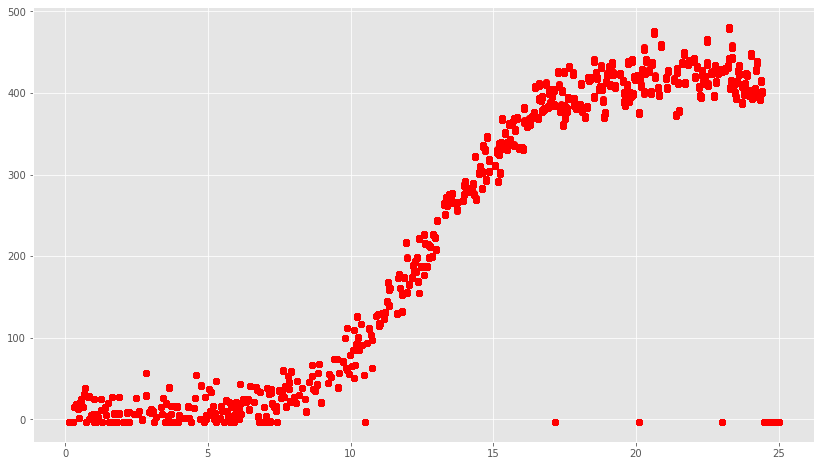

In [11]:
#plt.plot(xtrain, ytrain, 'bo', label = "real")
plt.plot(xtrain, model.predict(ytrain), 'ro', label = "predicted")


In [10]:
model.save("model.h5")

In [15]:
print(model.predict(ytrain))

[[-2.6331239 -2.6347895 -2.9830258 ... -2.7311866 -2.8196926 -2.7298355]
 [-2.6331239 -2.6347895 -2.9830258 ... -2.7311866 -2.8196926 -2.7298355]
 [-2.6331239 -2.6347895 -2.9830258 ... -2.7311866 -2.8196926 -2.7298355]
 ...
 [-2.6331239 -2.6347895 -2.9830258 ... -2.7311866 -2.8196926 -2.7298355]
 [-2.6331239 -2.6347895 -2.9830258 ... -2.7311866 -2.8196926 -2.7298355]
 [-2.6331239 -2.6347895 -2.9830258 ... -2.7311866 -2.8196926 -2.7298355]]
